# Eboss Neural Network on Flux Data

This notebook contains my attempts at training a model on the residual flux data instead of the base flux data. It seems to be doing better.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

from astropy.io import fits
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from keras.utils.vis_utils import plot_model

from keras import backend as K
from keras.models import Sequential
from keras.layers import Input,Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D, Conv2D, Conv1D, InputLayer, Dropout, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
from keras.constraints import Constraint
from keras.initializers import Initializer, glorot_uniform
from keras.utils import np_utils
from keras.layers import Concatenate
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Model

import tensorflow as tf

from Modeling import CrossValidationModeler

---
## Manga Multiline DATASET

In [4]:
manga_exp = h5py.File('../../Data/manga_multiline_expanded_OII_OIIIA_B_HIA.hdf5')
res_flux = np.array(manga_exp['res_flux_values'])
res_flux_expanded = np.array(manga_exp['res_flux_values_expanded'])
Y = np.array(manga_exp['flux_labels'])

manga_exp.close()

In [11]:
res_flux_expanded.shape

(2184, 12, 160)

In [18]:
X.shape

(2184, 1920, 1)

In [7]:
X = res_flux_expanded.reshape((2184, 12*160,1))

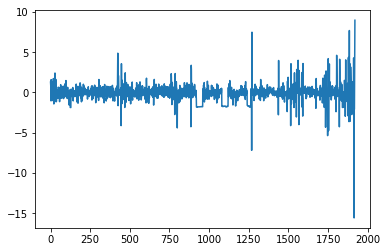

In [10]:
plt.plot(range(12*160), res_flux_expanded[:1].reshape(1, 12*160)[0])

# Testing convolution.

In [67]:
def expanded_model():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None, 21, 80, 1)))
    model.add(Conv2D(filters=12, kernel_size=(10,1), activation= 'relu'))
    #model.add(Conv2D(filters=6, kernel_size=(10,1), activation= 'relu'))
    model.add(MaxPooling2D((3,1)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

X_temp = res_flux_expanded.reshape((2184, 21, 80, 1))
X_train, X_test, y_train, y_test = train_test_split(X_temp, Y)

mod = expanded_model()
mod.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test), verbose=2)

Train on 1638 samples, validate on 546 samples
Epoch 1/10
 - 3s - loss: 0.7161 - acc: 0.6844 - val_loss: 0.4934 - val_acc: 0.8663
Epoch 2/10
 - 2s - loss: 0.4797 - acc: 0.8516 - val_loss: 0.3917 - val_acc: 0.8883
Epoch 3/10
 - 2s - loss: 0.3856 - acc: 0.8639 - val_loss: 0.3218 - val_acc: 0.8901
Epoch 4/10
 - 2s - loss: 0.3159 - acc: 0.8950 - val_loss: 0.3466 - val_acc: 0.8938
Epoch 5/10
 - 2s - loss: 0.2974 - acc: 0.9011 - val_loss: 0.2876 - val_acc: 0.8956
Epoch 6/10
 - 2s - loss: 0.3231 - acc: 0.8993 - val_loss: 0.2824 - val_acc: 0.9048
Epoch 7/10
 - 2s - loss: 0.2679 - acc: 0.9219 - val_loss: 0.3678 - val_acc: 0.8956
Epoch 8/10
 - 2s - loss: 0.2541 - acc: 0.9200 - val_loss: 0.3621 - val_acc: 0.9029
Epoch 9/10
 - 2s - loss: 0.2408 - acc: 0.9219 - val_loss: 0.2753 - val_acc: 0.9103
Epoch 10/10
 - 2s - loss: 0.2079 - acc: 0.9371 - val_loss: 0.3221 - val_acc: 0.8993


In [70]:
def create_conv_flux_model():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None,1920, 1)))
    model.add(Conv1D(filters=64, kernel_size=20,activation= 'relu'))
    model.add(Conv1D(filters=24, kernel_size=5,activation= 'relu'))
    model.add(MaxPooling1D(10))
    model.add(Flatten())
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

mod = create_conv_flux_model()
mod.fit(X_train, y_train, epochs=25, batch_size=8, validation_data=(X_test, y_test), verbose=2)

Train on 1638 samples, validate on 546 samples
Epoch 1/25
 - 4s - loss: 0.7030 - acc: 0.6856 - val_loss: 0.5659 - val_acc: 0.7473
Epoch 2/25
 - 3s - loss: 0.5611 - acc: 0.7753 - val_loss: 0.4431 - val_acc: 0.8791
Epoch 3/25
 - 4s - loss: 0.4987 - acc: 0.7955 - val_loss: 0.3678 - val_acc: 0.8791
Epoch 4/25
 - 3s - loss: 0.5046 - acc: 0.8034 - val_loss: 0.3462 - val_acc: 0.8535
Epoch 5/25
 - 4s - loss: 0.4390 - acc: 0.8101 - val_loss: 0.3444 - val_acc: 0.8791
Epoch 6/25
 - 4s - loss: 0.4214 - acc: 0.8089 - val_loss: 0.3196 - val_acc: 0.8828
Epoch 7/25
 - 3s - loss: 0.4081 - acc: 0.8394 - val_loss: 0.3011 - val_acc: 0.9048
Epoch 8/25
 - 3s - loss: 0.3629 - acc: 0.8498 - val_loss: 0.2954 - val_acc: 0.9048
Epoch 9/25
 - 3s - loss: 0.3440 - acc: 0.8681 - val_loss: 0.3354 - val_acc: 0.8993
Epoch 10/25
 - 3s - loss: 0.3549 - acc: 0.8596 - val_loss: 0.3110 - val_acc: 0.8938
Epoch 11/25
 - 4s - loss: 0.3295 - acc: 0.8492 - val_loss: 0.3383 - val_acc: 0.9066
Epoch 12/25
 - 4s - loss: 0.3126 - acc

For 4 emissin line verions

In [20]:
def create_conv_flux_model():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None,1920, 1)))
    model.add(Conv1D(filters=64, kernel_size=20,activation= 'relu'))
    model.add(Conv1D(filters=24, kernel_size=5,activation= 'relu'))
    model.add(MaxPooling1D(10))
    model.add(Flatten())
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
mod = create_conv_flux_model()
mod.fit(X_train, y_train, epochs=25, batch_size=8, validation_data=(X_test, y_test), verbose=2)

Train on 1638 samples, validate on 546 samples
Epoch 1/25
 - 15s - loss: 0.7036 - acc: 0.6178 - val_loss: 0.5981 - val_acc: 0.6667
Epoch 2/25
 - 14s - loss: 0.5946 - acc: 0.6270 - val_loss: 0.5689 - val_acc: 0.6667
Epoch 3/25
 - 13s - loss: 0.5959 - acc: 0.6319 - val_loss: 0.4688 - val_acc: 0.6667
Epoch 4/25
 - 14s - loss: 0.5772 - acc: 0.6331 - val_loss: 0.4351 - val_acc: 0.6667
Epoch 5/25
 - 13s - loss: 0.5519 - acc: 0.6337 - val_loss: 0.4608 - val_acc: 0.6667
Epoch 6/25
 - 13s - loss: 0.4935 - acc: 0.7228 - val_loss: 0.3999 - val_acc: 0.8864
Epoch 7/25
 - 14s - loss: 0.4891 - acc: 0.7558 - val_loss: 0.4023 - val_acc: 0.8974
Epoch 8/25
 - 14s - loss: 0.4790 - acc: 0.7753 - val_loss: 0.3928 - val_acc: 0.8901
Epoch 9/25
 - 14s - loss: 0.4666 - acc: 0.7827 - val_loss: 0.3706 - val_acc: 0.8956
Epoch 10/25
 - 15s - loss: 0.4838 - acc: 0.7582 - val_loss: 0.3691 - val_acc: 0.8993
Epoch 11/25
 - 14s - loss: 0.4498 - acc: 0.7802 - val_loss: 0.3754 - val_acc: 0.8846
Epoch 12/25
 - 14s - loss: 

In [35]:
def expanded_model():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None, 12, 160, 1)))
    model.add(Conv2D(filters=12, kernel_size=(5,1), activation= 'relu'))
    #model.add(Conv2D(filters=6, kernel_size=(10,1), activation= 'relu'))
    model.add(MaxPooling2D((6,1)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=.01), metrics=['accuracy'])
    return model

X_temp = res_flux_expanded.reshape((2184, 12, 160, 1))
X_train, X_test, y_train, y_test = train_test_split(X_temp, Y)

mod = expanded_model()
mod.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test), verbose=2)

Train on 1638 samples, validate on 546 samples
Epoch 1/20
 - 3s - loss: 5.6326 - acc: 0.6429 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 2/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 3/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 4/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 5/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 6/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 7/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 8/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 9/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 10/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 11/20
 - 2s - loss: 5.6450 - acc: 0.6459 - val_loss: 5.8397 - val_acc: 0.6337
Epoch 12/20
 - 2s - loss: 5.6450 - acc